<a href="https://colab.research.google.com/github/vyshali2419/NLP-2403A52028/blob/main/NLP%20LAB%20ASS%2011%20(2403A52028%20BATCH%2002).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# STEP 2 — Import Libraries

# For data handling
import pandas as pd
import numpy as np

# For text preprocessing
import string
import re

# For feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# For train-test split
from sklearn.model_selection import train_test_split

# For Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

# For evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# STEP 3 — Load and Explore Dataset

# Load dataset
df = pd.read_csv("news.csv", engine='python', on_bad_lines='warn')

# Display first 5 rows
print("First 5 samples:")
print(df.head())

# Check dataset size
print("\nDataset Shape:", df.shape)

# Check class distribution
print("\nClass Distribution:")
print(df['label'].value_counts())

First 5 samples:
   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  

Dataset Shape: (6335, 4)

Class Distribution:
label
REAL    3171
FAKE    3164
Name: count, dtype: int64


In [4]:
# STEP 4 — Text Preprocessing

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove stopwords
    words = text.split()
    words = [word for word in words if word not in ENGLISH_STOP_WORDS]

    return " ".join(words)

# Apply preprocessing
df['clean_text'] = df['text'].apply(preprocess_text)

print("\nSample Preprocessed Text:")
print(df['clean_text'].head())



Sample Preprocessed Text:
0    daniel greenfield shillman journalism fellow f...
1    google pinterest digg linkedin reddit stumbleu...
2    secretary state john f kerry said monday stop ...
3    — kaydee king kaydeeking november lesson tonig...
4    primary day new york frontrunners hillary clin...
Name: clean_text, dtype: object


In [5]:
# STEP 5 — Feature Extraction using TF-IDF

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(df['clean_text'])
y = df['label']

print("Feature Matrix Shape:", X.shape)

print("Sample Feature Names:")
print(vectorizer.get_feature_names_out()[:20])


Feature Matrix Shape: (6335, 79133)
Sample Feature Names:
['aa' 'aaa' 'aaaa' 'aaaaadd' 'aaaasetlayoutnew' 'aaas' 'aab' 'aachen'
 'aadhar' 'aadmi' 'aae' 'aahing' 'aaib' 'aaj' 'aakar' 'aakhri' 'aalia'
 'aaliya' 'aall' 'aam']


In [6]:
# STEP 6 — Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 5068
Testing samples: 1267


In [7]:
# STEP 7 — Train Naive Bayes Classifier

model = MultinomialNB()

# Train model
model.fit(X_train, y_train)

print("Model trained successfully!")
print("Model Parameters:", model.get_params())


Model trained successfully!
Model Parameters: {'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': True}


In [8]:
# STEP 8 — Model Evaluation

# Predictions
y_pred = model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.8389897395422258
Precision: 0.8684896397998213
Recall: 0.8389897395422258
F1 Score: 0.8354612435410972

Classification Report:
              precision    recall  f1-score   support

        FAKE       0.97      0.69      0.81       628
        REAL       0.77      0.98      0.86       639

    accuracy                           0.84      1267
   macro avg       0.87      0.84      0.84      1267
weighted avg       0.87      0.84      0.84      1267



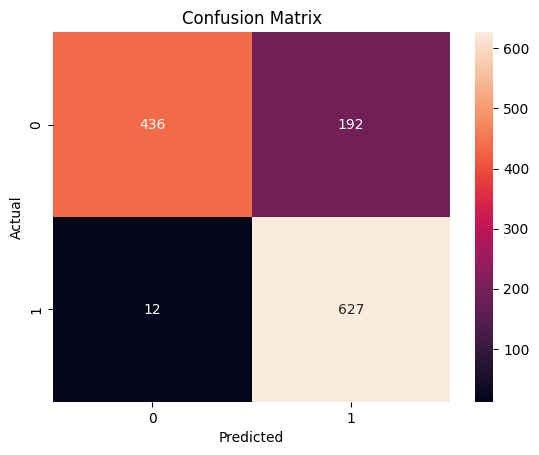

In [9]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
